## CSV to `GeoDataFrame`

In [1]:
import os
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Display all columns when looking at dataframes
pd.set_option('display.max.columns', None)

# Import power plants data
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/refs/heads/main/data/power_plants_epsg4269.csv'
power_plants = pd.read_csv(URL)

# Simplify column names
power_plants = power_plants.drop(columns = 'Unnamed: 0')
power_plants.head(3)

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900


Let's use the longitude and latitude columns in the CSV to create a geodataframe.

These indicate the location of the power plants in the NAD83 CRS (EPSG: 4269).

We can use the `geopandas` function `points_from_xy()`

In [3]:
# Create points from latitude and longitude
points = gpd.points_from_xy(power_plants.longitude,
                            power_plants.latitude)

# Create a geodataframe
power_plants = gpd.GeoDataFrame(power_plants, # Dataframe
                                geometry=points, # Specify geometry column
                                crs = 'EPSG:4269') # Specify CRS
power_plants

,objectid,plant_code,plant_name,utility_id,utility_name,sector_name,street_address,city,county,state,zip,primsource,source_desc,tech_desc,install_mw,total_mw,bat_mw,bio_mw,coal_mw,geo_mw,hydro_mw,hydrops_mw,ng_mw,nuclear_mw,crude_mw,solar_mw,wind_mw,other_mw,source,period,longitude,latitude,geometry
0,11570,1,Sand Point,63560,"TDX Sand Point Generating, LLC",Electric Utility,100 Power Plant Way,Sand Point,Aleutians East,Alaska,99661.0,petroleum,"Petroleum = 1.3 MW, Wind = 0.4 MW",Petroleum Liquids; Onshore Wind Turbine;,3.7,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,NaN,0.4,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-160.497222,55.339722,POINT (-160.49722 55.33972)
1,11571,2,Bankhead Dam,195,Alabama Power Co,Electric Utility,19001 Lock 17 Road,Northport,Tuscaloosa,Alabama,35476.0,hydroelectric,Hydroelectric = 53 MW,Conventional Hydroelectric,53.9,53.0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-87.356823,33.458665,POINT (-87.35682 33.45867)
2,11572,3,Barry,195,Alabama Power Co,Electric Utility,North Highway 43,Bucks,Mobile,Alabama,36512.0,natural gas,"Coal = 1118.5 MW, Natural Gas = 1296.2 MW",Conventional Steam Coal; Natural Gas Fired Com...,2569.5,2414.7,NaN,NaN,1118.5,NaN,NaN,NaN,1296.2,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-88.010300,31.006900,POINT (-88.01030 31.00690)
3,11573,4,Walter Bouldin Dam,195,Alabama Power Co,Electric Utility,750 Bouldin Dam Road,Wetumpka,Elmore,Alabama,36092.0,hydroelectric,Hydroelectric = 224.1 MW,Conventional Hydroelectric,225.0,224.1,NaN,NaN,NaN,NaN,224.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-86.283056,32.583889,POINT (-86.28306 32.58389)
4,11574,9,Copper,5701,El Paso Electric Co,Electric Utility,651 Hawkins Blvd.,El Paso,El Paso,Texas,79915.0,natural gas,Natural Gas = 63 MW,Natural Gas Fired Combustion Turbine,86.9,63.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-106.375000,31.756900,POINT (-106.37500 31.75690)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12004,23573,66723,Sawtell Solar,65736,"Sawtell Solar, LLC",IPP Non-CHP,NaN,NaN,NaN,North Carolina,NaN,solar,Solar = 3 MW,Solar Photovoltaic,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-82.375953,35.380139,POINT (-82.37595 35.38014)
12005,23574,66724,Southwick Solar,65737,"Southwick Solar, LLC",IPP Non-CHP,NaN,NaN,NaN,North Carolina,NaN,solar,Solar = 3 MW,Solar Photovoltaic,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-79.367698,36.009321,POINT (-79.36770 36.00932)
12006,23575,66725,Whiskey Solar,65738,"Whiskey Solar, LLC",IPP Non-CHP,NaN,NaN,NaN,North Carolina,NaN,solar,Solar = 5 MW,Solar Photovoltaic,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-79.736312,35.273434,POINT (-79.73631 35.27343)
12007,23576,66729,(3K) 59 Hetcheltown Rd,64872,"Distributed Solar Development, LLC",IPP Non-CHP,NaN,NaN,NaN,New York,NaN,solar,Solar = 1.4 MW,Solar Photovoltaic,1.4,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4,NaN,NaN,"EIA-860, EIA-860M and EIA-923",202305.0,-73.910480,42.876570,POINT (-73.91048 42.87657)


In [4]:
power_plants['geometry']

0        POINT (-160.49722 55.33972)
1         POINT (-87.35682 33.45867)
2         POINT (-88.01030 31.00690)
3         POINT (-86.28306 32.58389)
4        POINT (-106.37500 31.75690)
                    ...             
12004     POINT (-82.37595 35.38014)
12005     POINT (-79.36770 36.00932)
12006     POINT (-79.73631 35.27343)
12007     POINT (-73.91048 42.87657)
12008     POINT (-77.27590 41.83800)
Name: geometry, Length: 12009, dtype: geometry

In [6]:
print('CRS: ', power_plants.crs)
print('is CRS geographic?: ', power_plants.crs.is_geographic)

CRS:  EPSG:4269
is CRS geographic?:  True


<Axes: >

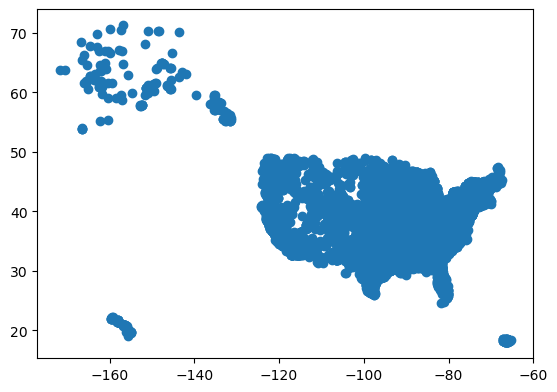

In [7]:
power_plants.plot()

## Import the shapefile data

In [8]:
fp = os.path.join('data','tl_2022_us_state','tl_2022_us_state.shp')
fp

'data/tl_2022_us_state/tl_2022_us_state.shp'

In [10]:
# Import states data
states = gpd.read_file(fp)
states

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."
5,1,1,44,01219835,44,RI,Rhode Island,00,G4000,A,2677763373,1323686975,+41.5964850,-071.5264901,"MULTIPOLYGON (((-71.67881 41.15891, -71.67626 ..."
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,214049908397,2391592787,+44.3484222,-114.5588538,"POLYGON ((-116.35844 49.00047, -116.34805 49.0..."
7,1,1,33,01779794,33,NH,New Hampshire,00,G4000,A,23190126218,1025960758,+43.6726907,-071.5843145,"POLYGON ((-70.83887 43.24449, -70.83886 43.244..."
8,3,5,37,01027616,37,NC,North Carolina,00,G4000,A,125935585728,13453835222,+35.5397100,-079.1308636,"POLYGON ((-77.89977 36.54460, -77.89942 36.544..."
9,1,1,50,01779802,50,VT,Vermont,00,G4000,A,23872569964,1030754610,+44.0589536,-072.6710173,"POLYGON ((-72.04187 44.15665, -72.04180 44.156..."
